# DS-SF-25 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [4]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [5]:
df.shape

(400, 4)

Answer: 400

> ### Question 2.  Create a summary table.

In [6]:
df.describe()

c:\Users\morgane1\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

Answer: GRE scores range from 130 to 170 counting in 1 point increments while GPAs range from 0 to 4 and count in increments of 1/10th. 

In [7]:
df['gre'].var()


13369.953039758006

In [9]:
df['gre'].std()

115.62851309152948

In [10]:
df['gpa'].var()

0.14487948622204228

> ### Question 4.  Drop data points with missing data.

In [11]:
df = df.dropna(subset = ['gre'])

In [12]:
df.gre.value_counts(dropna = False)

620.0    30
580.0    28
540.0    27
800.0    25
520.0    24
         ..
760.0     5
340.0     4
360.0     4
300.0     3
220.0     1
Name: gre, dtype: int64

In [13]:
df = df.dropna(subset = ['gpa'])

In [14]:
df.gpa.value_counts(dropna = False)

4.00    28
3.31     8
3.45     7
3.40     7
3.35     7
        ..
2.48     1
3.42     1
2.73     1
3.09     1
2.83     1
Name: gpa, dtype: int64

In [26]:
df = df.dropna(subset = ['prestige'])

In [27]:
df.gpa.value_counts(dropna = False)

4.00    28
3.31     8
3.45     7
3.40     7
3.35     7
        ..
2.48     1
3.42     1
2.73     1
3.09     1
2.83     1
Name: gpa, dtype: int64

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [15]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: I can tell because I checked each column individually above (because I am a novice), I can also tell because in the summar statistics table above there are no longer an NaN values. 

> ### Question 6.  Create boxplots for `gre` and `gpa`.

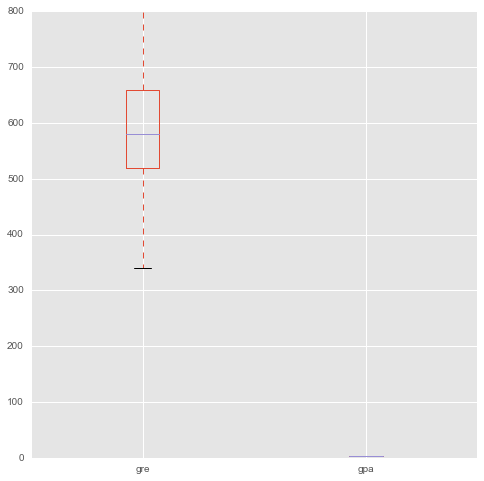

In [16]:
df[['gre','gpa']].plot(kind = 'box', figsize = (8,8))

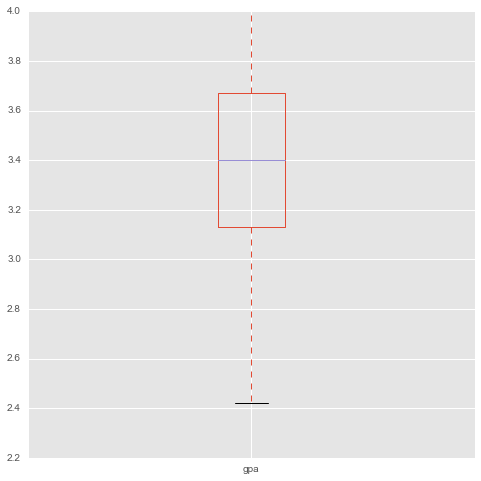

In [17]:
df.gpa.plot(kind = 'box', figsize = (8,8))

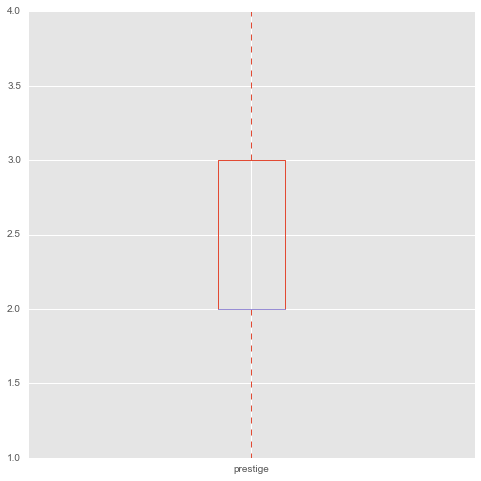

In [18]:
df.prestige.plot(kind = 'box', figsize = (8,8))

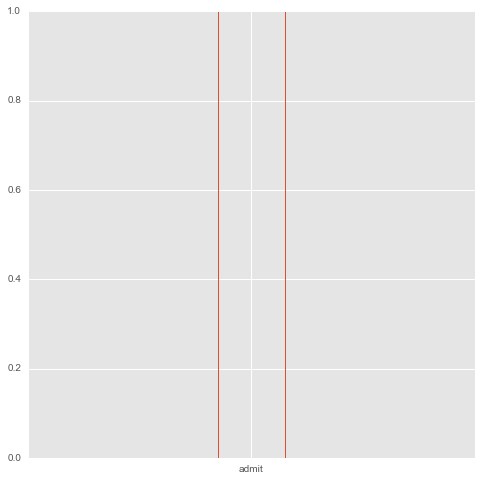

In [19]:
df.admit.plot(kind = 'box', figsize = (8,8))

> ### Question 7.  What do boxplots show?

Answer: Box plots show the middle 50 percent of the data in the box. This is also known as the inter quaretile range. I also think they are helpful in showing the spread of the data as you can get a good idea of outliers without having these taken into account. They also show the minimum and maximum data points. 

> ### Question 8.  Plot the distribution of each variable.

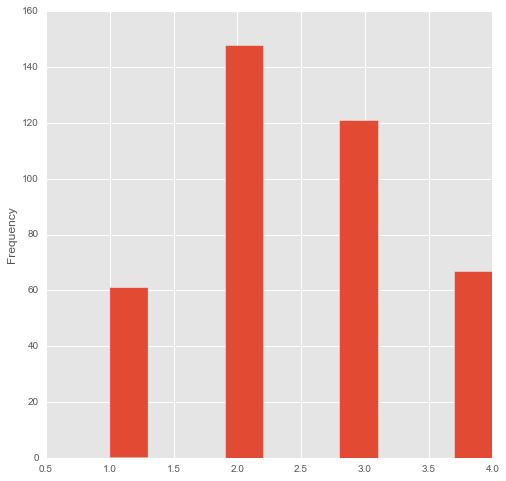

In [20]:
df.prestige.plot(kind = 'hist', figsize = (8,8))

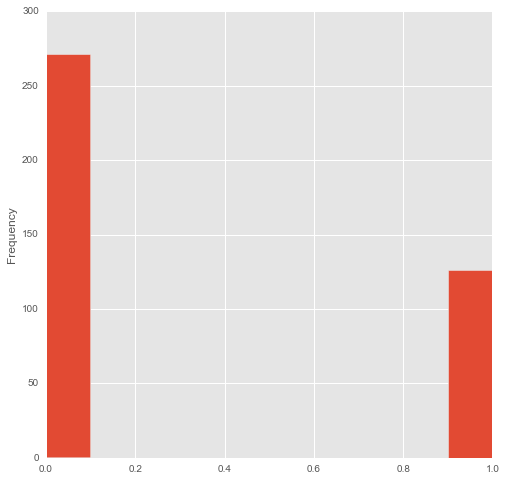

In [21]:
df.admit.plot(kind = 'hist', figsize = (8,8))

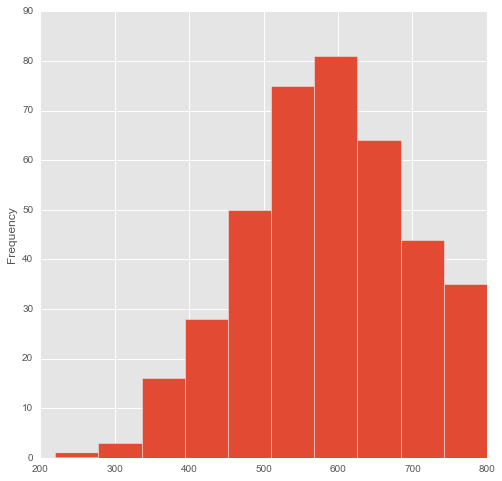

In [32]:
df.gre.plot(kind = 'hist', figsize = (8,8))

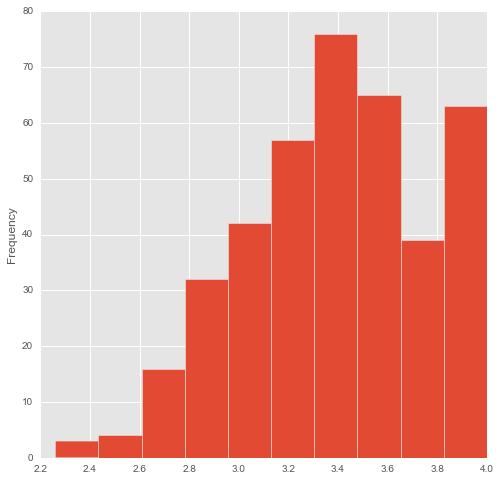

In [36]:
df.gpa.plot(kind = 'hist', figsize = (8,8))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: 
If our model had an assumption of normal distribution for gre and gpa, would we meet that requirement?
While both of the histograms show some skew to the right I would be comfortable assuming normalcy for both of them. 

> ### Question 10.  Create a correlation matrix for the dataset

In [37]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: There seems to be some positive correlation between gre and gpa scores, meaning a higher gpa score is indicative of a higher gre score and vice versa. 
Additionally there seems to be a positive correlation between admittance and gre and gpa scores. Because admittance is just a binary and not continuous I think this just means that higher gre and gpa scores are more likely to be correlated with admittance vs. rejection. I would have expected this correlation to be higher though. 
Lastly, of note, there seems to be a negative correlation between prestige and admittance. Meaning that higher admittance rates are correlated with less presitigious schools and vice versa. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Analysis plan: 
1. explore data
2. remove all NaN values
3. check for normalcy 
4. linear regression 

> ### Question 13.  What is your hypothesis?

Answer: My hypothesis is null: there is no correlation between the prestige of the undergraduate school attended by the student seeking admission and whether or not they are actually admitted to the graduate school of their choosing. 